In [12]:
# Instalar bibliotecas
!pip install scikit-learn matplotlib seaborn pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Generar datos sintéticos y crear DataFrame
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

df = pd.DataFrame(X, columns=['Caracteristica_1', 'Caracteristica_2'])
df['Target'] = y

print("DataFrame generado:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()



DataFrame generado:
   Caracteristica_1  Caracteristica_2  Target
0         -0.999102         -0.663860       1
1          1.246686          1.153597       1
2          0.962777          0.859397       1
3         -2.957441          2.033645       1
4          1.141165          1.059449       1

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Caracteristica_1  1000 non-null   float64
 1   Caracteristica_2  1000 non-null   float64
 2   Target            1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


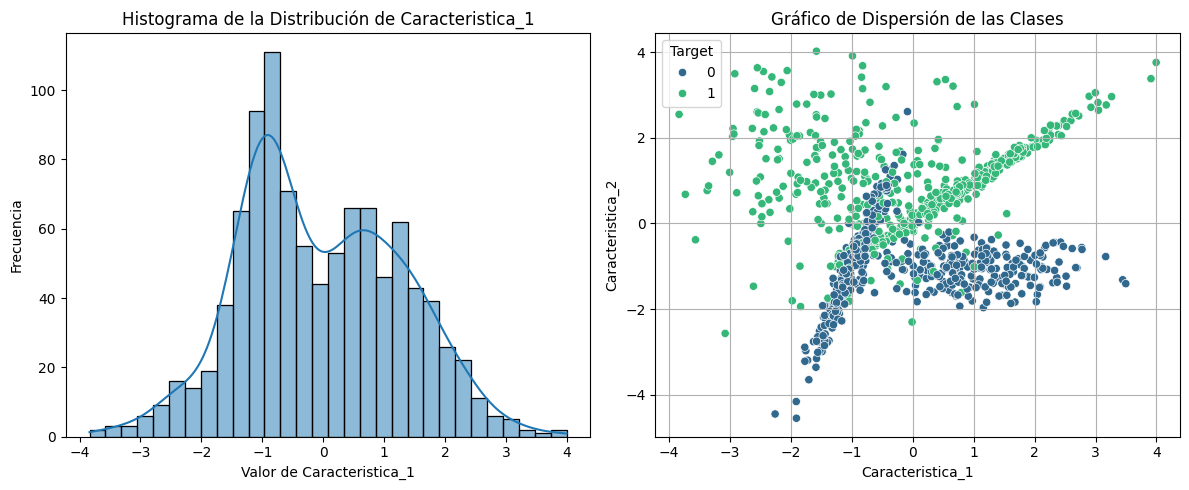

In [13]:
# Gráficos de exploración de datos
# Histograma de la 'Caracteristica_1'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Caracteristica_1', kde=True, bins=30)
plt.title('Histograma de la Distribución de Caracteristica_1')
plt.xlabel('Valor de Caracteristica_1')
plt.ylabel('Frecuencia')

# Gráfico de dispersión para visualizar la separación de clases
plt.subplot(1, 2, 2)
sns.scatterplot(x='Caracteristica_1', y='Caracteristica_2', hue='Target', data=df, palette='viridis')
plt.title('Gráfico de Dispersión de las Clases')
plt.xlabel('Caracteristica_1')
plt.ylabel('Caracteristica_2')
plt.grid(True)
plt.tight_layout()
plt.show()



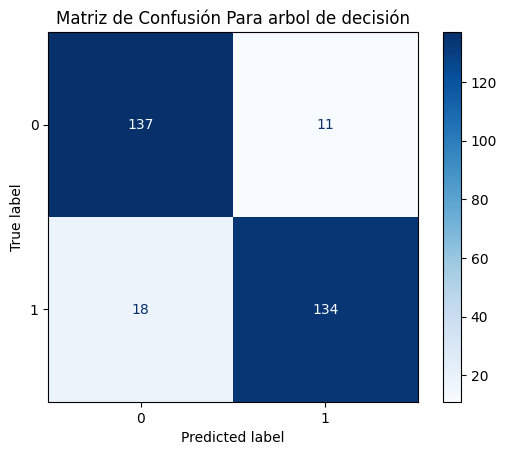

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       148
           1       0.92      0.88      0.90       152

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [14]:
# Modelo de Árbol de Decisión y Matriz de Confusión

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Para arbol de decisión')
plt.show()
print("Reporte de Clasificación:")

# Reporte coon metricas del arbol de decisión
print(classification_report(y_test, y_pred))

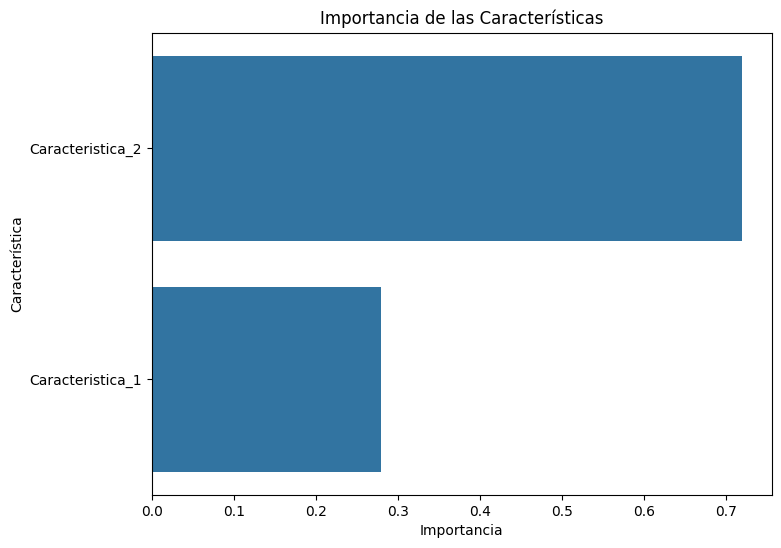

In [16]:
# Gráfico de barras de la importancia de las características
feature_importances = pd.DataFrame({
    'feature': ['Caracteristica_1', 'Caracteristica_2'],
    'importance': tree_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()